<a href="https://colab.research.google.com/github/julyaW11/fraud-detection-genai-augmentation/blob/main/genAI_for_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -q -U google-generativeai pandas scikit-learn

In [15]:
import google.generativeai as genai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

#Machine Learning Biblioteca
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Configurando chave de API **

In [26]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('api_key')

genai.configure(api_key=GOOGLE_API_KEY)


#Testando se funcionou
model = genai.GenerativeModel('gemini-pro-latest')
response = model.generate_content("Olá, Gemini! A conexão funcionou?")
print(response.text)

Olá! Sim, funcionou perfeitamente. Recebi sua mensagem. 😊

Como posso te ajudar hoje?


# *Case:*

Construir um modelo para detectar transações fraudulentas.
O dataset está desbalanceado, 99% das transações são transações legítimas.

# 1 - Carregando Dataset

In [29]:
url_fraud = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df_fraud = pd.read_csv(url_fraud)

In [30]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
df_fraud.shape

(284807, 31)

Class Column:

0 - Transação Legítima /
1 - Transação Fraudulent

In [34]:
df_fraud.sample(5) #Selecionando 5 linhas --aletaórias-- dentro do Dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190837,129001.0,-5.056736,-3.580852,0.496380,-2.642989,1.429102,1.188211,-0.789421,-1.007763,-0.821135,2.196951,0.962006,-1.114158,-0.663432,-1.108958,0.183218,-0.595042,0.398581,-0.787949,-0.906592,-3.529823,-0.329453,0.420050,1.585291,-0.712653,0.918196,-0.049121,-0.643592,-0.567648,15.60,0
239201,150002.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,-0.199626,0.032017,-0.374731,0.354051,0.041228,-0.154750,-0.482455,-0.842462,-0.206385,0.022677,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
79019,57822.0,-0.308302,0.972616,0.998833,0.053297,0.400334,-0.897145,1.036315,-0.175900,-0.762651,-0.450046,-0.031260,0.047006,-0.154992,0.449095,0.647146,-0.631582,0.149639,-0.834016,-0.439152,-0.105797,0.203435,0.643740,-0.136602,0.449770,-0.319597,0.368054,0.103675,0.144273,5.98,0
256359,157656.0,-0.714512,1.508310,0.507118,-1.248057,1.353717,-0.603720,2.518808,-2.866651,2.149781,3.017262,0.509668,0.149515,1.036366,-2.008296,0.497353,-1.093864,-1.426783,-0.499209,-0.756657,1.004380,0.514785,0.930592,-0.342808,1.179271,0.164575,-0.450424,-0.718803,-1.415439,42.99,0
176173,122655.0,-0.796409,-0.122764,0.274961,-3.806252,-0.422110,-1.526825,0.164081,0.185268,-0.046037,-1.467646,-1.562246,0.055127,-0.146538,0.265567,-0.351494,-1.672953,-0.282084,1.389102,-1.241731,-0.720900,-0.129298,0.004296,-0.205671,-0.119922,0.059596,-0.355236,0.011115,0.044592,15.28,0


In [38]:
df_fraud['Class'].value_counts()


,count
Class,
0,284315
1,492


In [39]:
df_fraud['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


# Modelo 1 - Criação do Modelo de Regressão Logística APENAS com Base de dados

In [49]:
X = df_fraud.drop ('Class', axis= 1) #excluindo coluna Class
y = df_fraud['Class']
# y.sample(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Modelo de regressão
model = LogisticRegression() #max_iter = 50 ; #max_iter = 100 ;
model.fit(X_train, y_train)
y_pred_baseline = model.predict(X_test)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.66      0.69       136

    accuracy                           1.00     85443
   macro avg       0.87      0.83      0.85     85443
weighted avg       1.00      1.00      1.00     85443



# Matriz de confusão - Modelo 1

Text(50.722222222222214, 0.5, 'Real')

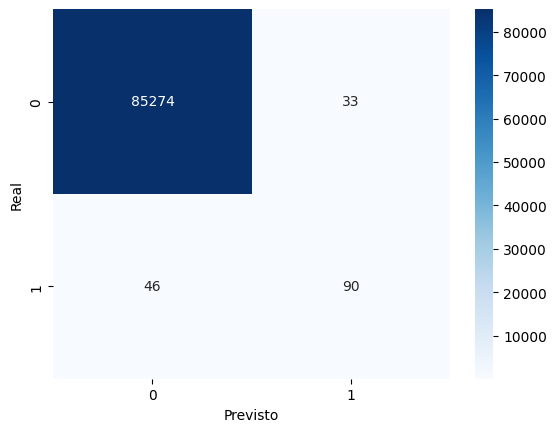

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')


# **Criação de dados sintéticos**

In [64]:

# #Printando linhas com transações fraudulentas
# df_fraud_true = X_train [y_train == 1].sample(5)
# for index, row in df_fraud_true.iterrows():
#   print(row)

exemplos_texto = ''
for i, row in df_fraud_true.iterrows():
    exemplos_texto += f"Exemplo de transação fraudulenta {i+1}:\n"
    exemplos_texto += str(row.to_dict()) + "\n\n"

print(exemplos_texto)

Exemplo de transação fraudulenta 234706:
{'Time': 148074.0, 'V1': -2.21921860215056, 'V2': 0.727831411106392, 'V3': -5.45822994652182, 'V4': 5.92484984705884, 'V5': 3.93246382376344, 'V6': -3.0859842366267, 'V7': -1.67786998770016, 'V8': 0.865074610405235, 'V9': -3.17726028894586, 'V10': -3.41920738405664, 'V11': 3.69317394224412, 'V12': -3.97843975507806, 'V13': -1.71859087457346, 'V14': -8.63629739365259, 'V15': -0.242964821455265, 'V16': 1.17488417316765, 'V17': 2.13460635695284, 'V18': 2.59436483300614, 'V19': -1.25758897993879, 'V20': 0.96477180373471, 'V21': 0.41747174595057, 'V22': -0.817343384056975, 'V23': -0.0287524020141088, 'V24': 0.0257225108657227, 'V25': -0.825835343221856, 'V26': -0.0130890304987416, 'V27': 0.413291188715315, 'V28': -0.131387346404896, 'Amount': 0.0}

Exemplo de transação fraudulenta 150663:
{'Time': 93853.0, 'V1': -5.83919161928092, 'V2': 7.1515323543223, 'V3': -12.8167600806187, 'V4': 7.03111476501099, 'V5': -9.6512721679897, 'V6': -2.93842725771624, 

In [67]:
prompt_geracao = f"""
Você é um especialista em ciência de dados simulando dados para um modelo de detecção de fraude.
Com base nos exemplos de transações fraudulentas abaixo, gere 10 novos exemplos de transações fictícias, mas realistas, que sigam um padrão semelhante.
Retorne apenas os dicionários de dados, um por linha, sem texto adicional.

Exemplos:
{exemplos_texto}

Gere 10 novos exemplos aqui:
"""

print(prompt_geracao)


Você é um especialista em ciência de dados simulando dados para um modelo de detecção de fraude.
Com base nos exemplos de transações fraudulentas abaixo, gere 10 novos exemplos de transações fictícias, mas realistas, que sigam um padrão semelhante.
Retorne apenas os dicionários de dados, um por linha, sem texto adicional.

Exemplos:
Exemplo de transação fraudulenta 234706:
{'Time': 148074.0, 'V1': -2.21921860215056, 'V2': 0.727831411106392, 'V3': -5.45822994652182, 'V4': 5.92484984705884, 'V5': 3.93246382376344, 'V6': -3.0859842366267, 'V7': -1.67786998770016, 'V8': 0.865074610405235, 'V9': -3.17726028894586, 'V10': -3.41920738405664, 'V11': 3.69317394224412, 'V12': -3.97843975507806, 'V13': -1.71859087457346, 'V14': -8.63629739365259, 'V15': -0.242964821455265, 'V16': 1.17488417316765, 'V17': 2.13460635695284, 'V18': 2.59436483300614, 'V19': -1.25758897993879, 'V20': 0.96477180373471, 'V21': 0.41747174595057, 'V22': -0.817343384056975, 'V23': -0.0287524020141088, 'V24': 0.02572251086

# Modelo 2 - Criação do Modelo de Regressão Logística com Base de dados + dados sintéticos

In [70]:
model_gen = genai.GenerativeModel('gemini-pro-latest')
response = model_gen.generate_content(prompt_geracao)
print(response.text)

{'Time': 85204.0, 'V1': -4.80433149476295, 'V2': 3.99042318738368, 'V3': -8.11322055620956, 'V4': 4.34633729578644, 'V5': -3.88412355462725, 'V6': -1.97327318898952, 'V7': -5.19520853400582, 'V8': 1.6934823906915, 'V9': -2.90981923485764, 'V10': -7.52597402685043, 'V11': 4.9213702283995, 'V12': -9.58579493633519, 'V13': -0.421639145618698, 'V14': -10.3541604930182, 'V15': 0.814324264669614, 'V16': -6.84519967262453, 'V17': -11.4583151475753, 'V18': -4.11306122615462, 'V19': 1.03125218730957, 'V20': 0.46322301138676, 'V21': 0.883249021724227, 'V22': -0.356529342784803, 'V23': -0.171694380293297, 'V24': 0.282332997637841, 'V25': 0.141019183852178, 'V26': -0.103091176214041, 'V27': 0.155365511394541, 'V28': -0.21853245453086, 'Amount': 102.55}
{'Time': 161405.0, 'V1': -1.98379708687353, 'V2': 2.13824458378859, 'V3': -3.4203730249097, 'V4': 3.11682333550882, 'V5': -0.925405021200055, 'V6': -1.25301850116812, 'V7': -2.95123307584611, 'V8': 1.02672159539316, 'V9': -2.18524275069455, 'V10': -

In [75]:
new_fraud = []
for line in response.text.strip().split('\n'):
  try:
      new_fraud.append(ast.literal_eval(line))
  except:
    continue

df_new_fraud = pd.DataFrame(new_fraud)

Importante checar se há melhoria na precisão do modelo

In [78]:
df_new_fraud['Class'] = 1

print('--Treinando Modelo com dados Sintétucos--')
X_train_aumentation = pd.concat([X_train, df_new_fraud.drop('Class', axis=1)], ignore_index=True)
y_train_aumentation = pd.concat([y_train, df_new_fraud['Class']], ignore_index=True)

model_gendata = LogisticRegression(max_iter=1000)
model_gendata.fit(X_train_aumentation, y_train_aumentation)
y_pred_gendata = model_gendata.predict(X_test)

print(classification_report(y_test, y_pred_gendata))

--Treinando Modelo com dados Sintétucos--
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.62      0.70       136

    accuracy                           1.00     85443
   macro avg       0.90      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Matriz de confusão - Modelo 2

Text(50.722222222222214, 0.5, 'Real')

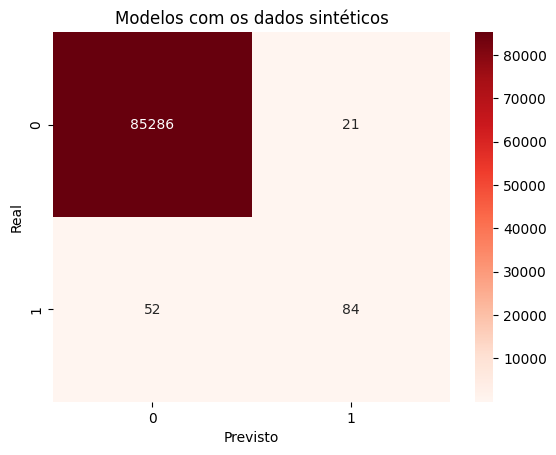

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred_gendata), annot=True, fmt='g', cmap='Reds')
plt.title('Modelos com os dados sintéticos')
plt.xlabel('Previsto')
plt.ylabel('Real')